### Importación de datos



In [1]:
import pandas as pd

!pip install matplotlib==3.8.1
import matplotlib.pyplot as plt

paleta_de_colores = ["#fbf8cc","#fde4cf","#ffcfd2","#f1c0e8","#cfbaf0","#a3c4f3","#90dbf4","#8eecf5","#98f5e1","#b9fbc0"]

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 1. Análisis de facturación



In [2]:
# creamos una lista que almacene todas las tiendas
tiendas = [tienda1, tienda2, tienda3, tienda4]

In [3]:
# Creamos una lista de diccionarios donde almacenaremos los datos que vamos estudiando de las tiendas.
datos = []

In [4]:
# Agregamos cada diccionario por tienda a datos, así cada elemento de la lista, será un diccionario correspondiente a una tienda, el cual será iniciado con la llave 'nombre' con el valor 'Tienda'+número de tienda
for i in range(len(tiendas)):
  datos.append({'nombre':'tienda'+str(i+1)})

In [5]:
# visualizamos cómo queda
datos

[{'nombre': 'tienda1'},
 {'nombre': 'tienda2'},
 {'nombre': 'tienda3'},
 {'nombre': 'tienda4'}]

En este primer análisis, calculamos el ingreso total de cada tienda. Sumando los valores de la columna 'Precio' de cada conjunto de datos de la tienda para estimar los ingresos, almacenandolos en una lista aparte para luego poder mostrar los datos con un gráfico de barras y añadiendo el dato obtenido a la tienda correspondiente en nuestra lista 'datos'

In [6]:
# definimos una función para calcular los ingresos totales por tienda. La función recibirá la lista de tiendas. Añadirá ese valor a nuestra lista 'datos' en la tienda correspondiente bajo la llave 'ingresosTotales', que a su vez devuelva una lista de tuplas con formato (tiendaN, ingresoTotal) con la cual creará un gráfico de barras, pero que sirve de base para graficar en cualquier formato; y un string informando cuál fue la tienda que más vendió, junto a una pequeña tabla que resuma la información

def ingresosTotalesPorTienda(listaTiendas):
    '''Función para calcular los ingresos totales por tienda y agregarlo a la lista "datos" modificandola con la llave "ingresosTotales" y su valor correspondiente. 
    
    Args:
        La función recibirá una lista de tiendas. 
        
    Outputs:
        Muestra un gráfico de barras y una tabla comparativa con los ingresos totales por tienda.

    Returns:
        Lista de tuplas con formato (tiendaN, ingresoTotal)
        
    
    '''


    # iteraremos sobre cada una de las tiendas
    # lo haremos en base a su índice 
    listaTuplasSalida = []
    
    for i in range(len(listaTiendas)):
        # dentro de la tienda actual estamos recorriendo por índice, creamos una nueva llave 'ingresosTotales' y asignamos el valor de la suma de la lista precio correspondiente a dicha precio usando la función sum()
        datos[i]['ingresosTotales']=sum(listaTiendas[i]['Precio'])
        listaTuplasSalida.append((datos[i]['nombre'], datos[i]['ingresosTotales']))


    # para mostrar un gráfico de barra con ingresos totales por tienda
    plt.title("Ventas por tienda")

    # ya que en nuestra listaTuplaSalida las tuplas estan ordenadas como (nombre, valor) 
    # podemos armar una lista de los nombres
    # [tienda[0] for tienda in listaTuplasSalida] para el eje x
    # y otra de los valores facilmente, 
    # [tienda[1] for tienda in listaTuplasSalida] para el eje y.
    plt.bar(x = [tienda[0] for tienda in listaTuplasSalida], height = [tienda[1] for tienda in listaTuplasSalida], width=0.5, color = paleta_de_colores)
    plt.show()
    

    # para redactar cuál fue la tienda que más vendió
    
    # usamos nuevamente nuestra tupla accediendo a los elementos de index 1
    # y con max() buscamos el valor máximo de todos los ingresos totales
    mayorIngresoTotal = max([tienda[1] for tienda in listaTuplasSalida])

    # y con el valor del máximo, buscamos por indexación el nombre de la tienda dentro de las tuplas con index 0
    # a esa lista agregamos .index(valor a buscar), que en nuestro caso el valor a buscar es el de mayor ingreso, obtenemos su índice, al cuál debemos sumar 1, ya que los nombres de nuestras tiendas parten de 1, mientras que la indexación lo hace desde 0.
    tiendaMayorVenta = 'tienda'+str([tienda[1] for tienda in listaTuplasSalida].index(mayorIngresoTotal)+1)

    # imprimimos el mensaje de la tienda con más ventas
    print(f'La tienda qué más vendió fue la {tiendaMayorVenta} con {mayorIngresoTotal} ingresos totales')

    # agregamos una pequeña tabla para visualizar los ingresos totales por tienda

    # iteraremos sobre nuestra listaTuplasSalida para ir mostrando los resultados, partiendo desde -1 para tener la sección de columna y fila

    for fila in range(2):
        for columna in range(-1,len(listaTuplasSalida)):
            # para la primera columna
            if columna == -1:
                if fila == 0:
                    print(f"{'Tienda'.center(20)} | ", end="")
                elif fila == 1:
                    print(f"{'Ingresos Totales'.center(20)} | ", end="")
            # para el resto de las columnas
            elif columna<len(listaTuplasSalida)-1:
                print(f'{str(listaTuplasSalida[columna][fila]).center(15)} | ', end="")
            elif columna==len(listaTuplasSalida)-1:
                print(f'{str(listaTuplasSalida[columna][fila]).center(15)}')
                


    # devolvemos la tupla obtenida para poder usarla en gráfico
    return listaTuplasSalida

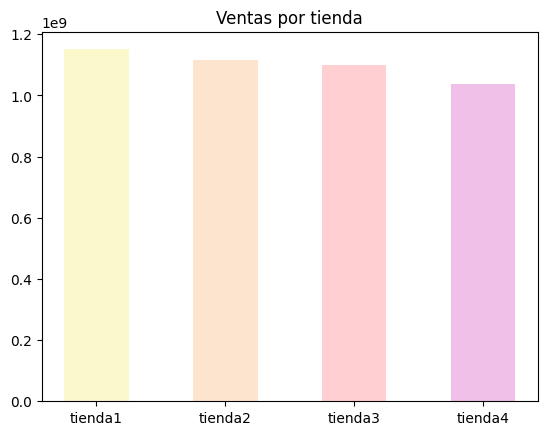

La tienda qué más vendió fue la tienda1 con 1150880400.0 ingresos totales
       Tienda        |     tienda1     |     tienda2     |     tienda3     |     tienda4    
  Ingresos Totales   |   1150880400.0  |   1116343500.0  |   1098019600.0  |   1038375700.0 


[('tienda1', 1150880400.0),
 ('tienda2', 1116343500.0),
 ('tienda3', 1098019600.0),
 ('tienda4', 1038375700.0)]

In [7]:
# aplicamos la función y verificamos la salida
ingresosTotalesPorTienda(tiendas)

In [8]:
# verificamos como quedó nuestra lista 'datos'
datos

[{'nombre': 'tienda1', 'ingresosTotales': 1150880400.0},
 {'nombre': 'tienda2', 'ingresosTotales': 1116343500.0},
 {'nombre': 'tienda3', 'ingresosTotales': 1098019600.0},
 {'nombre': 'tienda4', 'ingresosTotales': 1038375700.0}]

In [9]:
help(ingresosTotalesPorTienda)

Help on function ingresosTotalesPorTienda in module __main__:

ingresosTotalesPorTienda(listaTiendas)
    Función para calcular los ingresos totales por tienda y agregarlo a la lista "datos" modificandola con la llave "ingresosTotales" y su valor correspondiente.

    Args:
        La función recibirá una lista de tiendas.

    Outputs:
        Muestra un gráfico de barras y una tabla comparativa con los ingresos totales por tienda.

    Returns:
        Lista de tuplas con formato (tiendaN, ingresoTotal)



# 2. Ventas por categoría

En este paso calcularemos la cantidad de productos vendidos por categoría en cada tienda. 
La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [12]:
# iniciaremos una lista llamada "categorias" para ir anexando dentro todas las categorías en caso de que esté presente en una tienda, y en otra no.
categorias = []

In [16]:
# accedemos a una lista de tuplas con el formato (número de venta, categoría del producto vendido)  con 
# list(tiendas[0]["Categoría del Producto"].items())
list(tiendas[0]["Categoría del Producto"].items())

[(0, 'Electrónicos'),
 (1, 'Muebles'),
 (2, 'Juguetes'),
 (3, 'Electrodomésticos'),
 (4, 'Muebles'),
 (5, 'Juguetes'),
 (6, 'Juguetes'),
 (7, 'Electrodomésticos'),
 (8, 'Electrodomésticos'),
 (9, 'Juguetes'),
 (10, 'Electrodomésticos'),
 (11, 'Electrodomésticos'),
 (12, 'Electrónicos'),
 (13, 'Artículos para el hogar'),
 (14, 'Deportes y diversión'),
 (15, 'Libros'),
 (16, 'Deportes y diversión'),
 (17, 'Juguetes'),
 (18, 'Electrónicos'),
 (19, 'Juguetes'),
 (20, 'Electrodomésticos'),
 (21, 'Deportes y diversión'),
 (22, 'Deportes y diversión'),
 (23, 'Muebles'),
 (24, 'Libros'),
 (25, 'Artículos para el hogar'),
 (26, 'Artículos para el hogar'),
 (27, 'Instrumentos musicales'),
 (28, 'Deportes y diversión'),
 (29, 'Juguetes'),
 (30, 'Electrodomésticos'),
 (31, 'Juguetes'),
 (32, 'Muebles'),
 (33, 'Deportes y diversión'),
 (34, 'Juguetes'),
 (35, 'Deportes y diversión'),
 (36, 'Electrónicos'),
 (37, 'Muebles'),
 (38, 'Libros'),
 (39, 'Muebles'),
 (40, 'Electrónicos'),
 (41, 'Muebles'),

In [ ]:
# iremos iterando sobre cada tienda de la lista

# aplicamos sobre el objeto map con una función lambda, que nos devuelva únicamente el segundo valor de la tupla que corresponde a la categoría del producto en dicha tienda
for i in range(len(tiendas)):
    list(map(lambda x: categorias.append(x[1]) if x[1] not in categorias else None,list(tiendas[i]["Categoría del Producto"].items())))

categorias

['Electrónicos',
 'Muebles',
 'Juguetes',
 'Electrodomésticos',
 'Artículos para el hogar',
 'Deportes y diversión',
 'Libros',
 'Instrumentos musicales']

In [30]:
datos[0]

{'nombre': 'tienda1', 'ingresosTotales': 1150880400.0}

In [21]:
# crearemos una lista de listas, con tuplas, donde cada lista de la lista, corresponde a una tienda, y dentro incluye tuplas con el formato (categoria, cantidad de elementos vendidos de la categoría).

productosPorCategoriaPorTienda = []

In [ ]:
# iteramos sobre la lista de tiendas
for i in range(len(tiendas)):
    # dentro de una tienda, obtendremos una lista con la categoría de cada producto vendido
    tienda = list(map(lambda x: x[1],list(tiendas[i]["Categoría del Producto"].items())))

    # creamos una nueva lista para almacenar las tuplas (categoria, cantProductos) dentro de nuestra lista productosPorCategoriaPorTienda al finalizar el conteo
    listaProvisoria = []

    # iteraremos sobre cada categoría obtenida previamente para contar la cantidad de veces que se repite con .count y agregarlo a nuestra listaProvisoria
    [listaProvisoria.append((categoria,tienda.count(categoria))) for categoria in categorias]

    #list(map(lambda categoria: listaProvisoria.append((categoria,tienda.count(categoria))), categorias))

    # hacemos lo mismo que antes, pero para agregar los datos de cantidad de productos vendidos por categoría dentro de nuestra lista datos
    
    #list(map(lambda categoria: datos[i]['categorias'][categoria]:tienda.count(categoria), categorias))

    # finalmente agregamos nuestra listaProvisoria a nuestra lista de productosPorCategoriaPorTienda

    productosPorCategoriaPorTienda.append(listaProvisoria)

productosPorCategoriaPorTienda

SyntaxError: invalid syntax (2045687944.py, line 10)

In [34]:
# iteramos sobre la lista de tiendas
for i in range(len(tiendas)):
    # dentro de una tienda, obtendremos una lista con la categoría de cada producto vendido
    tienda = list(map(lambda x: x[1],list(tiendas[i]["Categoría del Producto"].items())))

    # creamos una nueva lista para almacenar las tuplas (categoria, cantProductos) dentro de nuestra lista productosPorCategoriaPorTienda al finalizar el conteo
    listaProvisoria = []

    # y creamos dentro de nuestra lista datos, la llave 'categorias' con valor igual a un diccionario vacío

    datos[i]['categorias'] = {}

    # iteraremos sobre cada categoría obtenida previamente para contar la cantidad de veces que se repite con .count
    for categoria in categorias:
        listaProvisoria.append((categoria,tienda.count(categoria)))
        # modificamos a su vez nuestro objeto datos agregando la categoría con el conteo a cada tienda dentro de la llave "categorías"
        datos[i]
    
    # finalmente agregamos nuestra listaProvisoria a nuestra lista de productosPorCategoriaPorTienda

    productosPorCategoriaPorTienda.append(listaProvisoria)

productosPorCategoriaPorTienda

[[('Electrónicos', 448),
  ('Muebles', 465),
  ('Juguetes', 324),
  ('Electrodomésticos', 312),
  ('Artículos para el hogar', 171),
  ('Deportes y diversión', 284),
  ('Libros', 173),
  ('Instrumentos musicales', 182)],
 [('Electrónicos', 422),
  ('Muebles', 442),
  ('Juguetes', 313),
  ('Electrodomésticos', 305),
  ('Artículos para el hogar', 181),
  ('Deportes y diversión', 275),
  ('Libros', 197),
  ('Instrumentos musicales', 224)],
 [('Electrónicos', 451),
  ('Muebles', 499),
  ('Juguetes', 315),
  ('Electrodomésticos', 278),
  ('Artículos para el hogar', 177),
  ('Deportes y diversión', 277),
  ('Libros', 185),
  ('Instrumentos musicales', 177)],
 [('Electrónicos', 451),
  ('Muebles', 480),
  ('Juguetes', 338),
  ('Electrodomésticos', 254),
  ('Artículos para el hogar', 201),
  ('Deportes y diversión', 277),
  ('Libros', 187),
  ('Instrumentos musicales', 170)],
 [('Electrónicos', 448),
  ('Muebles', 465),
  ('Juguetes', 324),
  ('Electrodomésticos', 312),
  ('Artículos para el ho

In [35]:
datos

[{'nombre': 'tienda1', 'ingresosTotales': 1150880400.0, 'categorias': {}},
 {'nombre': 'tienda2', 'ingresosTotales': 1116343500.0, 'categorias': {}},
 {'nombre': 'tienda3', 'ingresosTotales': 1098019600.0, 'categorias': {}},
 {'nombre': 'tienda4', 'ingresosTotales': 1038375700.0, 'categorias': {}}]

In [22]:
a = list(map(lambda x: x[1],list(tiendas[i]["Categoría del Producto"].items())))
a

['Electrodomésticos',
 'Muebles',
 'Deportes y diversión',
 'Libros',
 'Electrónicos',
 'Electrodomésticos',
 'Instrumentos musicales',
 'Electrónicos',
 'Electrónicos',
 'Muebles',
 'Deportes y diversión',
 'Juguetes',
 'Libros',
 'Muebles',
 'Muebles',
 'Muebles',
 'Electrónicos',
 'Artículos para el hogar',
 'Muebles',
 'Juguetes',
 'Deportes y diversión',
 'Electrodomésticos',
 'Muebles',
 'Juguetes',
 'Muebles',
 'Muebles',
 'Deportes y diversión',
 'Muebles',
 'Muebles',
 'Electrodomésticos',
 'Libros',
 'Libros',
 'Muebles',
 'Juguetes',
 'Muebles',
 'Electrónicos',
 'Juguetes',
 'Deportes y diversión',
 'Electrónicos',
 'Electrónicos',
 'Juguetes',
 'Muebles',
 'Muebles',
 'Electrónicos',
 'Juguetes',
 'Muebles',
 'Muebles',
 'Juguetes',
 'Electrónicos',
 'Electrodomésticos',
 'Artículos para el hogar',
 'Deportes y diversión',
 'Instrumentos musicales',
 'Instrumentos musicales',
 'Libros',
 'Juguetes',
 'Electrónicos',
 'Electrónicos',
 'Artículos para el hogar',
 'Muebles',


In [ ]:

    

    for i in range(len(listaTiendas)):
        # añadimos dentro de cada tienda en 'datos' el elemento llamado "categorias" que tendrá un diccionario vacío donde luego añadiremos las categorías con cantidad de productos vendidos por tienda.
        datos[i]['categorias']={}

        # dentro de la tienda con tiendas[i], ingresaremos a "Categoría del Producto"
        # tiendas[i]["Categoría del Producto"] nos devuelve un objeto de tipo pandas.core.series.Series
        # tiendas[i]['Categoría del Producto'].items() nos devuelve un objeto tipo zip
        # con list(tiendas[i]['Categoría del Producto'].items()) nos devuelve una lista de tuplas, donde el primer elemento será del registro, y el segundo la categoría de dicha venta, cuyo index será 1
        for categoria in list(listaTiendas[i]['Categoría del Producto'].items()):

            # por eso dentro de los items de categoría, para acceder propiamente el nombre de la categoría del producto, debemos usar categoria[1]
            
            # si la categoría ya existe dentro de nuestro registro de categorías en datos, adicionamos 1 a su valor, para saber cuántos productos fueron vendidos de esa categoría
            if categoria[1] in datos[i]['categorias']:
                datos[i]['categorias'][categoria[1]] += 1
            # si la categoría no existe en nuestro registro, la inicializamos con valor = 1
            else:
                datos[i]['categorias'][categoria[1]] = 1

        #para ordenar alfabéticamente las categorías
        datos[i]['categorias'] = dict(sorted(datos[i]['categorias'].items()))
    
       


In [10]:
def ventasPorCategoria (listaTiendas):
    '''Función que lee una lista de las tiendas, agrega a la lista "datos" creada previamente, una llave "categorias" con un valor igual a un nuevo diccionario, que contiene como llave las distintas categorías con un valor igual a la cantidad de productos vendidos de esa categoría.

    args:
        lista de tiendas

    return:

    '''
    # dentro de cada elemento de la lista datos, se encuentra una tienda. A cada tienda añadiremos un elemento a su diccionario llamado "categorias", 
    # el cuál será un diccionario que luego almacenará como llaves las distintas categorías y cuyos valores serán la cantidad de productos vendidos de esa categorías.

    # iniciaremos una lista llamada "categorias" para ir anexando dentro todas las categorías en caso de que esté presente en una tienda, y en otra no.

    categorias = []

    

    for i in range(len(listaTiendas)):
        # añadimos dentro de cada tienda en 'datos' el elemento llamado "categorias" que tendrá un diccionario vacío donde luego añadiremos las categorías con cantidad de productos vendidos por tienda.
        datos[i]['categorias']={}

        # dentro de la tienda con tiendas[i], ingresaremos a "Categoría del Producto"
        # tiendas[i]["Categoría del Producto"] nos devuelve un objeto de tipo pandas.core.series.Series
        # tiendas[i]['Categoría del Producto'].items() nos devuelve un objeto tipo zip
        # con list(tiendas[i]['Categoría del Producto'].items()) nos devuelve una lista de tuplas, donde el primer elemento será del registro, y el segundo la categoría de dicha venta, cuyo index será 1
        for categoria in list(listaTiendas[i]['Categoría del Producto'].items()):

            # por eso dentro de los items de categoría, para acceder propiamente el nombre de la categoría del producto, debemos usar categoria[1]
            
            # si la categoría ya existe dentro de nuestro registro de categorías en datos, adicionamos 1 a su valor, para saber cuántos productos fueron vendidos de esa categoría
            if categoria[1] in datos[i]['categorias']:
                datos[i]['categorias'][categoria[1]] += 1
            # si la categoría no existe en nuestro registro, la inicializamos con valor = 1
            else:
                datos[i]['categorias'][categoria[1]] = 1

        #para ordenar alfabéticamente las categorías
        datos[i]['categorias'] = dict(sorted(datos[i]['categorias'].items()))
    
       
